##Text Generation 
Thinking of text generation by itself seems like a difficult problem, so let us think of it like predicting the next word in the sentence. We are using an irish song for this problem. 
We will tokenize the words in the song and generate sequences from them as we always do. But there is a catch, this time we will generate sequences in such a way that it is a supervised learining problem where the first 2 words are one sequence then first 3 words are another sequence and so on. 


We will then split the sequence into x and y where x is all but the last word of the sequence and you guessed it y is the last word of the sequence.

Then we will train a model 

In [1]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.3.0


In [2]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

sentences = data.lower().split("\n")

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
total_words = len(word_index) + 1
print(word_index)
print("The total number of words are: ", total_words)
print("The sentence \"In the town of Athy one Jeremy Lanigan\" as a sequence is :")
print(tokenizer.texts_to_sequences(["In the town of Athy one Jeremy Lanigan"]))

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [3]:
sequences = []
for sentence in sentences:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)

The sentence is converted to parts inorder to create the learning problem which is to predict the next word. So with parts of the sentence at each instance, the model can predict the next word.

In [4]:
sequences[0:7]

[[4, 2],
 [4, 2, 66],
 [4, 2, 66, 8],
 [4, 2, 66, 8, 67],
 [4, 2, 66, 8, 67, 68],
 [4, 2, 66, 8, 67, 68, 69],
 [4, 2, 66, 8, 67, 68, 69, 70]]

In [5]:
max_sequence_length = max([len(x) for x in sequences])
# padding = "pre" is really important in this case
padded = np.array(pad_sequences(sequences, maxlen=max_sequence_length, padding="pre"))

In [6]:
padded[0:7]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  2, 66],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  2, 66,  8],
       [ 0,  0,  0,  0,  0,  0,  4,  2, 66,  8, 67],
       [ 0,  0,  0,  0,  0,  4,  2, 66,  8, 67, 68],
       [ 0,  0,  0,  0,  4,  2, 66,  8, 67, 68, 69],
       [ 0,  0,  0,  4,  2, 66,  8, 67, 68, 69, 70]], dtype=int32)

In [7]:

xs, labels = padded[:,:-1], padded[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [8]:
# an array containing all but the last word of the sequence
xs[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4], dtype=int32)

In [9]:
# an array containing the last word in one hot encoding format
# total words is 263 so is the size of this array
ys[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(total_words, 64, input_length=max_sequence_length-1),# -1 because me separated x and y
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                             tf.keras.layers.Dense(total_words, activation="softmax")
])
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            16832     
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 263)               10783     
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(xs,ys,epochs=500)

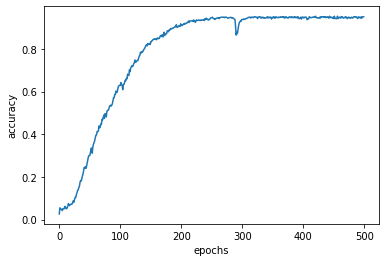

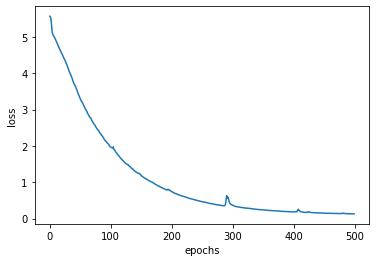

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [21]:
my_string = "razi went to dublin and he"
next_word = 30
my_sequence = tokenizer.texts_to_sequences([my_string])

for _ in range(next_word):
    token_list = tokenizer.texts_to_sequences([my_string])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length, padding="pre")
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    my_string += " " + output_word
print(my_string)


razi went to dublin and he piper plenty in academy glisten glisten had for mad at together together together at together at lanigans ball ball ball ball ball ball ball ball entangled odaly hall fair fair


In [20]:
seed_text = "Laurence went to dublin"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_length-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Laurence went to dublin as plenty as water water cask cask glisten cask glisten hearty hearty hearty father spent might ask hall hall glisten glisten hearty hearty glisten cask glisten father spent might hall eyes together together spent ladies glisten glisten glisten father together ball wall wall lanigans ball ball wall wall wall together mad together together together at together together ball lanigans ball ball ball ball ball ball entangled together mad together at lanigans ball ball ball ball ball ball ball entangled entangled ned rat hall hall hall hall hall glisten glisten cask glisten glisten twas wall wall wall wall ned rat mchugh
